In [ ]:
#prac8 : Implement linear regression and logistic regression.



Linear Regression:


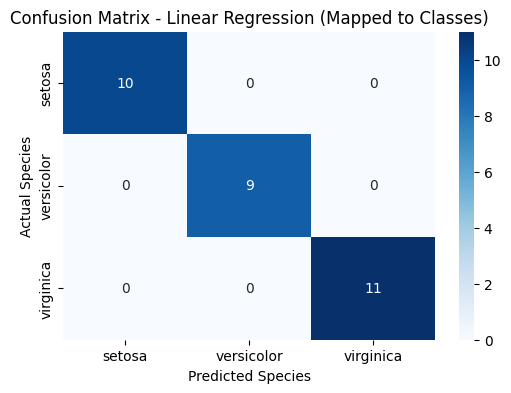


Logistic Regression:


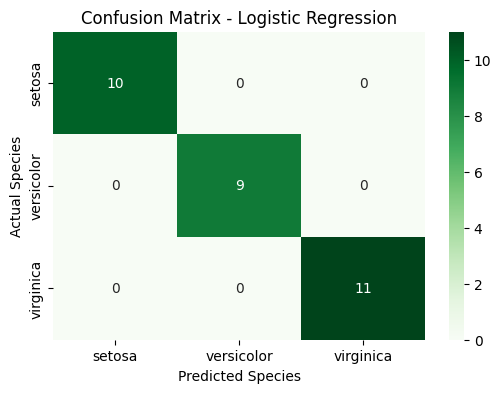

In [6]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Step 3: Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LINEAR REGRESSION - Modified to Match 3x3 Matrix ###
print("\nLinear Regression:")
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)  # Training on species prediction (mapped via regression)

# Predict species values using linear regression
y_pred_linear = linear_regressor.predict(X_test)

# Map continuous predictions to discrete species classes (0, 1, 2)
y_pred_linear_classes = np.round(y_pred_linear).astype(int)  # Rounding to nearest integer class
y_pred_linear_classes = np.clip(y_pred_linear_classes, 0, 2)  # Ensuring predictions are within 0-2

# Create 3x3 confusion matrix for Linear Regression
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear_classes)

# Plot confusion matrix for Linear Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_linear, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Linear Regression (Mapped to Classes)")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### LOGISTIC REGRESSION ###
print("\nLogistic Regression:")
logistic_regressor = LogisticRegression(max_iter=200)
logistic_regressor.fit(X_train, y_train)

# Predict species on the test set
y_pred_logistic = logistic_regressor.predict(X_test)

# Create 3x3 confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Greens", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()
